# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [28]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Airma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Read your api key environment variable
key = os.getenv("news_api_key")

In [30]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=key)

In [31]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [32]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [33]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-28,Bitcoin. Sean Gladwell\r\nSean Gladwell\r\nCry...,0.4391,0.157,0.074,0.769
1,2021-11-08,"NEW YORK, Nov 8 (Reuters) - Inflows into bitco...",0.3612,0.072,0.000,0.928
2,2021-11-11,The Fine Print: The following comments are own...,-0.0418,0.079,0.086,0.835
3,2021-11-17,HONG KONG/SINGAPORE (Reuters) - Bitcoin and et...,-0.7906,0.000,0.229,0.771
4,2021-11-11,"Over the long run, investing in the stock mark...",0.4939,0.084,0.000,0.916


In [34]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-23,Ethereum has been on a tear this year. Its out...,0.6542,0.178,0.0,0.822
1,2021-10-29,"The exchange rates and logos of Bitcoin (BTH),...",0.0000,0.000,0.0,1.000
2,2021-11-11,"Over the long run, investing in the stock mark...",0.4939,0.084,0.0,0.916
3,2021-11-18,The digital currency space is contracting afte...,0.4939,0.119,0.0,0.881
4,2021-11-18,Partnership commences with launch of weekly ne...,0.2500,0.061,0.0,0.939


In [35]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.180939,0.070310,0.027460,0.902220
std,0.377806,0.067947,0.054396,0.083258
min,-0.848100,0.000000,0.000000,0.651000
25%,0.000000,0.000000,0.000000,0.849500
50%,0.190100,0.066000,0.000000,0.921000
75%,0.458800,0.117500,0.040500,0.963250
max,0.871800,0.273000,0.290000,1.000000


In [36]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.195128,0.067990,0.021250,0.910780
std,0.377800,0.063944,0.045461,0.069168
min,-0.790600,0.000000,0.000000,0.747000
25%,0.000000,0.000000,0.000000,0.865750
50%,0.238150,0.062000,0.000000,0.920500
75%,0.476700,0.105000,0.000000,0.960000
max,0.889900,0.251000,0.191000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score at 0.68

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score at 0.88

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score at 0.26

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [45]:
# Complete the tokenizer function
def tokenizer(text):
    #Tokenizes text

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create Sentences
    sent = sent_tokenize(re_clean)
    
    # Create a tokenized list of the words
    words_tokenized = []
    words = []
    
    for word in sent:
        word = word_tokenize(word)
        words = word.append(words)

    
    # Convert the words to lowercase and remove stop words
    text = [word.lower() for word in text if word.lower() not in stop_words]
 
       
    # Lemmatize words into root words
    words = word_tokenize(re_clean)
    lematized = [lemmatizer.lemmatize(word) for word in words]  
    tokens = [word.lower() for word in lematized if word.lower() not in stop_words]
    return tokens

In [46]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-28,Bitcoin. Sean Gladwell\r\nSean Gladwell\r\nCry...,0.4391,0.157,0.074,0.769,"[bitcoin, sean, gladwellsean, gladwellcrypto, ..."
1,2021-11-08,"NEW YORK, Nov 8 (Reuters) - Inflows into bitco...",0.3612,0.072,0.000,0.928,"[new, york, nov, reuters, inflows, bitcoin, pr..."
2,2021-11-11,The Fine Print: The following comments are own...,-0.0418,0.079,0.086,0.835,"[fine, print, following, comment, owned, whoev..."
3,2021-11-17,HONG KONG/SINGAPORE (Reuters) - Bitcoin and et...,-0.7906,0.000,0.229,0.771,"[hong, kongsingapore, reuters, bitcoin, ether,..."
4,2021-11-11,"Over the long run, investing in the stock mark...",0.4939,0.084,0.000,0.916,"[long, run, investing, stock, market, ha, one,..."


In [47]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-23,Ethereum has been on a tear this year. Its out...,0.6542,0.178,0.0,0.822,"[ethereum, ha, tear, year, outperformed, bitco..."
1,2021-10-29,"The exchange rates and logos of Bitcoin (BTH),...",0.0000,0.000,0.0,1.000,"[exchange, rate, logo, bitcoin, bth, ether, et..."
2,2021-11-11,"Over the long run, investing in the stock mark...",0.4939,0.084,0.0,0.916,"[long, run, investing, stock, market, ha, one,..."
3,2021-11-18,The digital currency space is contracting afte...,0.4939,0.119,0.0,0.881,"[digital, currency, space, contracting, reachi..."
4,2021-11-18,Partnership commences with launch of weekly ne...,0.2500,0.061,0.0,0.939,"[partnership, commences, launch, weekly, newsl..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams

In [112]:
# Generate the Bitcoin N-grams where N=2

bitcoin_counts = ngrams(tokenizer(str(bitcoin_df.text)), n=2)
df_bitcoin_tokens = bitcoin_df['tokens']
list(bitcoin_counts)


[('bitcoin', 'sean'),
 ('sean', 'gladwellrnsean'),
 ('gladwellrnsean', 'gladwellrncry'),
 ('gladwellrncry', 'new'),
 ('new', 'york'),
 ('york', 'nov'),
 ('nov', 'reuters'),
 ('reuters', 'inflows'),
 ('inflows', 'bitco'),
 ('bitco', 'fine'),
 ('fine', 'print'),
 ('print', 'following'),
 ('following', 'comment'),
 ('comment', 'hong'),
 ('hong', 'kongsingapore'),
 ('kongsingapore', 'reuters'),
 ('reuters', 'bitcoin'),
 ('bitcoin', 'et'),
 ('et', 'long'),
 ('long', 'run'),
 ('run', 'investing'),
 ('investing', 'stock'),
 ('stock', 'mark'),
 ('mark', 'indian'),
 ('indian', 'generationz'),
 ('generationz', 'investor'),
 ('investor', 'hopping'),
 ('hopping', 'bitcoin'),
 ('bitcoin', 'cccbtcusd'),
 ('cccbtcusd', 'saw'),
 ('saw', 'new'),
 ('new', 'alltime'),
 ('alltime', 'high'),
 ('high', 'happened'),
 ('happened', 'eric'),
 ('eric', 'adams'),
 ('adams', 'new'),
 ('new', 'york'),
 ('york', 'city'),
 ('city', 'despite'),
 ('despite', 'relative'),
 ('relative', 'sideways'),
 ('sideways', 'action

In [121]:
# Generate the Ethereum N-grams where N=2
# bitcoin_counts = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
ethereum_counts = ngrams(tokenizer(str(ethereum_df.text)), n=2)
list(ethereum_counts)


[('ethereum', 'ha'),
 ('ha', 'tear'),
 ('tear', 'year'),
 ('year', 'exchange'),
 ('exchange', 'rate'),
 ('rate', 'logo'),
 ('logo', 'bitcoin'),
 ('bitcoin', 'bth'),
 ('bth', 'long'),
 ('long', 'run'),
 ('run', 'investing'),
 ('investing', 'stock'),
 ('stock', 'mark'),
 ('mark', 'digital'),
 ('digital', 'currency'),
 ('currency', 'space'),
 ('space', 'contracting'),
 ('contracting', 'afte'),
 ('afte', 'partnership'),
 ('partnership', 'commences'),
 ('commences', 'launch'),
 ('launch', 'weekly'),
 ('weekly', 'ne'),
 ('ne', 'launch'),
 ('launch', 'eth'),
 ('eth', 'staking'),
 ('staking', 'service'),
 ('service', 'rocket'),
 ('rocket', 'pool'),
 ('pool', 'number'),
 ('number', 'ethereum'),
 ('ethereum', 'address'),
 ('address', 'holding'),
 ('holding', 'new'),
 ('new', 'york'),
 ('york', 'slapdash'),
 ('slapdash', 'alliance'),
 ('alliance', 'crypto'),
 ('crypto', 'fan'),
 ('fan', 'wa'),
 ('wa', 'ether'),
 ('ether', 'eth'),
 ('eth', 'pundit'),
 ('pundit', 'shouting'),
 ('shouting', 'th'),
 

In [113]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    # Returns the top N tokens from the frequency count
    return Counter(tokens).most_common(N)

In [120]:
# Use token_count to get the top 10 words for Bitcoin
tokens_bitcoin = tokenizer(str(bitcoin_df.text))
token_count(tokens_bitcoin, 10)

[('bitcoin', 3),
 ('new', 3),
 ('reuters', 3),
 ('york', 2),
 ('sean', 1),
 ('gladwellrnsean', 1),
 ('gladwellrncry', 1),
 ('nov', 1),
 ('inflows', 1),
 ('bitco', 1)]

In [122]:
# Use token_count to get the top 10 words for Ethereum
tokens_ethereum = tokenizer(str(ethereum_df.text))
token_count(tokens_ethereum, 10)

[('ethereum', 2),
 ('launch', 2),
 ('eth', 2),
 ('ha', 1),
 ('tear', 1),
 ('year', 1),
 ('exchange', 1),
 ('rate', 1),
 ('logo', 1),
 ('bitcoin', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

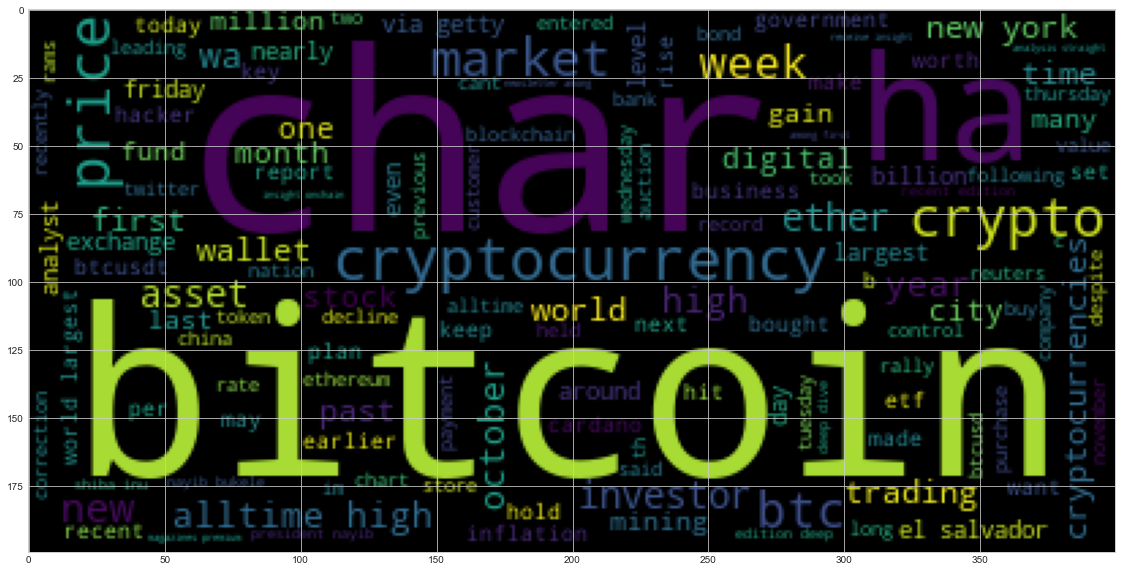

In [81]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_df['text'])
input_text = tokenizer(big_string)
wc_text = ' '.join(input_text)
wc = WordCloud().generate(wc_text)
plt.imshow(wc)

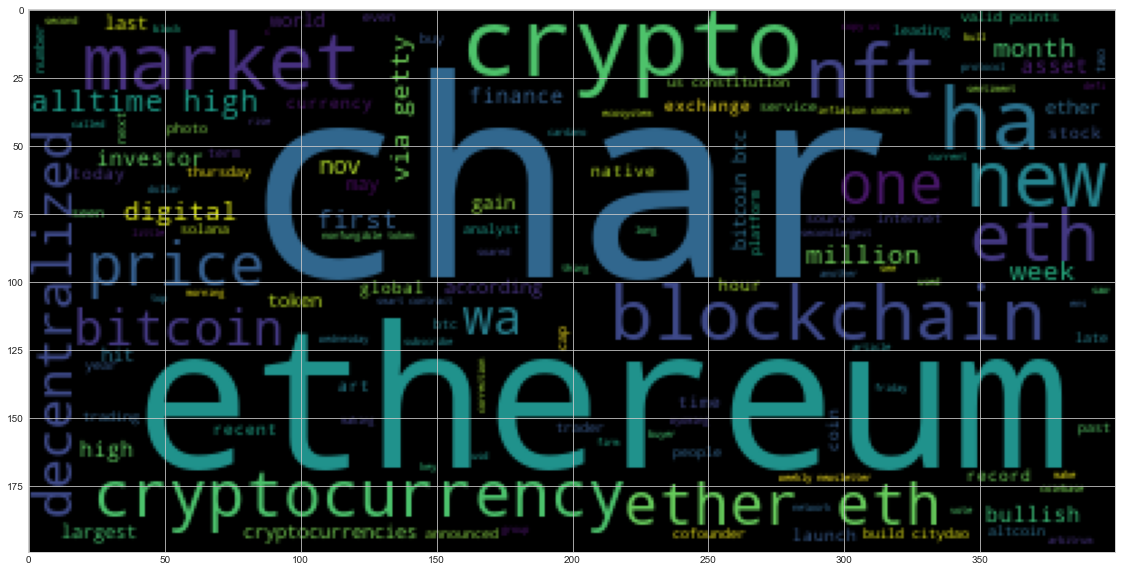

In [82]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum_df['text'])
input_text = tokenizer(big_string)
wc_text = ' '.join(input_text)
wc = WordCloud().generate(wc_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [83]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [84]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [85]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(bitcoin_df['text'])

In [87]:
# Run the NER processor on all of the text
ner_btc = nlp(bitcoin_text)

# Add a title to the document
ner_btc.user_data["title"] = "Bitcoin NER"

In [88]:
# Render the visualization
displacy.render(ner_btc, style='ent')

In [89]:
# List all Entities

for entity in ner_btc.ents:
    print(entity.text, entity.label_)

Sean Gladwell PERSON
Sean Gladwell PERSON
Crypto PERSON
NEW YORK GPE
Nov 8 DATE
Reuters ORG
a record $6.4 billion MONEY
this year DATE
CoinShares ORG
The Fine Print WORK_OF_ART
HONG KONG/SINGAPORE GPE
Reuters ORG
two CARDINAL
Wednesday DATE
a century DATE
a little over 11 years DATE
more than 7,700,000,000 CARDINAL
Miamis PRODUCT
all 442,000 CARDINAL
May 2010 DATE
Satoshi Nakamoto PERSON
Riot Blockchain PERSON
2009 DATE
first ORDINAL
Satoshi Nakamoto PERSON
CityCoins ORG
New Yorks GPE
nearly $3 trillion MONEY
last week DATE
10% to 20% PERCENT
2021 DATE
the Securities and Exchange Commission ORG
Friday DATE
Ethereum PERSON
Solana PERSON
Cardano PERSON
ADA ORG
more than 10% PERCENT
the last week DATE
Thanksgiving DATE
weekly DATE
Thursday DATE
Friday DATE
Los Angeles Rams GPE
Odell Beckham Jr. ORG
Twitter WORK_OF_ART
Monday DATE
Bitcoin GPE
Instagram ORG
2018 DATE
the new month DATE
This week DATE
Discord ORG
Discord ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
Nayib Bukele PERSON


---

### Ethereum NER

In [90]:
# Concatenate all of the Bitcoin text together
ethereum_text = ' '.join(ethereum_df['text'])

In [91]:
# Run the NER processor on all of the text
ner_eth = nlp(ethereum_text)

# Add a title to the document
ner_eth.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(ner_eth, style='ent')

In [92]:
# List all Entities

for entity in ner_eth.ents:
    print(entity.text, entity.label_)

this year DATE
this year DATE
Mark Cuban PERSON
Bitcoin (BTH ORG
Monero PERSON
XMR ORG
ATM ORG
Bity PERSON
House ORG
nearly $3 trillion MONEY
last week DATE
10% to 20% PERCENT
weekly DATE
100 CARDINAL
Metaverse
 ORG
ETH ORG
TIME ORG
ETH ORG
Ethereum PERSON
NFT ORG
Ethereum PERSON
Solana PERSON
Cardano PERSON
ADA ORG
more than 10% PERCENT
the last week DATE
Wyoming GPE
Wyoming GPE
the U.S. Constitution ORG
last week DATE
today DATE
roughly half CARDINAL
Today DATE
Ethereum PERSON
almost $66,000 MONEY
more than a week ago DATE
Ethereum PERSON
Grimes GPE
millions of dollars MONEY
the new month DATE
the Bureau of Labor Statistics ORG
U.S. GPE
1.2 million CARDINAL
2026 DATE
Daxx ORG
July DATE
Wyoming GPE
Decentralized Autonomous Organizations PERSON
Scotland GPE
this month DATE
Alberta GPE
Canada GPE
second ORDINAL
4,400 MONEY
Friday DATE
as much as 4.8% PERCENT
4,459 MONEY
Bitcoiners GPE
Ethereum PERSON
CryptoPunks ORG
CryptoPunk ORG
Punk PERSON
Larva Labs PERSON
NFT ORG
first ORDINAL
Wedn

---